**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho


Grupo número ( A  )

---


Aluno(a): Alison Pereira Ribeiro

---

Aluna(o): Leidiane Beatriz Passos Rodrigues

---

Aluno(a): Thiago de Andrade Corrêa

---

#Especificação do problema : Incerteza

A partir da base de dados disponibilizada anteriormente, projetar e implementar uma rede bayesiana que correlacione o desempenho nos dois primeiros períodos do curso com um bom desempenho final e permita fazer previsões sobre o desempenho final de novos alunos.

Para isso, considere:


1.  Um aluno com bom desempenho é aquele que se forma em até 4 anos ou se forma com média igual ou superior a 7 ou  se forma com número de reprovações igual ou inferior a 5.

2. Para o treinamento do modelo, considere apenas as disciplinas dos dois primeiros períodos do curso.


**Observação**: O trabalho deve ser feito em grupo, mas a avaliação será feita individualmente. Para isso, o grupo deverá fazer um planejamento/cronograma de trabalho e a contribuição de cada membro deverá ser devidamente identificado


#Planejamento de atividades

Utilizar a ferramenta  [Trello](https://trello.com )  para organizar o trabalho, distribuindo as tarefas e registrando (EXPLICITAMENTE) as interações entre os membros do grupo.

- Eleger um gerente de projeto para organizar as atividades no Trello e coordenar a equipe.
- Planejar o que deve ser feito, distribuindo equitativamente as atividades entre os membros do grupo. Estabelecer atividades a serem feitas, prazos para sua entrega e produtos a serem entregues para cada atividade.

- O planejamento das atividades deve, necessariamente incluir:
  - Cronograma do trabalho a ser realizado.
  - Associação das tarefas a serem realizadas a quem deverá realizá-las.
  - Cada tarefa deve estar associada a um produto a ser entregue.
  - Em todos os dias devem ser atribuídas atividades a todos os membros do grupo.
  
- **O planejamento deve ser entregue na primeira aula em que o tópico for trabalhado**.



## Descrição do modelo

- O grupo deverá descrever o modelo a ser implementado e como ele foi instanciado para resolver o problema proposto. No caso de uma rede bayesiana, deve ser descrito, pelo menos:
  - O que é uma rede bayesiana;
  - Qual a arquitetura da rede a ser utilizada;
  - Quais as variáveis aleatórias utilizadas e quais as suas respectivas TPC's. Todas as decisões de projeto devem estar devidamente justificadas.
   - Apresentar graficamente a arquitetura final com os parâmetros finais.
   

- Os dados utilizados devem ser detalhadamente descritos. 

  - Quais os dados efetivamente utilizados da base de dados fornecida?
  - Quais as tabelas de probabilidade condicionais foram utilizadas? Como elas foram obtidas?

## Descrição do modelo

Para resolver o problema proposto iremos utilizar o modelo de rede bayesiana. Redes bayesianas são modelos gráficos probabilísticos baseados em grafos acíclicos dirigidos. Em que cada nó da rede está associado a uma variável aleatória e uma distribuição de probabilidade condicional em função dos pais deste nó. Uma rede Bayesiana é uma forma de representação compacta de uma distribuição de probabilidade conjunta das variáveis do modelo. 
O modelo que propomos vai utilizar as aprovações obtidas nas dez primeiras disciplinas, então vamos coletar os dados desses aluno e calcular as probabilidades de formar em 4 anos ou menos OU ter média acima ou igual a 7 OU ter menos ou cinco reprovações ao longo do curso. O modelo deve ser capaz de responder perguntas preditivas sobre se um aluno é bom ou mau aluno. Esperamos poder responder assim à pergunta "O aluno X consegue ser classificado como um bom aluno tendo reprovado na disciplina W e Y, mas sido aprovado em Z?" 


##Arquitetura da rede bayesiana

Uma  rede  bayesiana  tem  uma  arquitetura  de  um  grafo  acíclico,  onde  os  nós  representam  as  variáveis  (de  entrada  e  de  saída)  que  se  interrelacionam  e  representam  a  estrutura  de  raciocínio  de  um especialista  num  domínio  de  aplicação.  Os  nós  são  ligados  por  arcos,  direcionados  no  sentido  do  nó  saída  para  o  nó  de  entrada,  e  para  cada  arco  devem  ser  estimados  os  valores  da  probabilidade  condicional que representam as regras do tipo “SE saída ENTÃO entrada”. Assim, uma rede bayesiana é  constituída  de  duas  partes:  a  qualitativa  que  são  os  nós  da  rede;  e  a  quantitativa  que  são  as  probabilidades. 

As tabelas condicionais foram calculadas utilizando as disciplinas, aprovação ou não nelas, então colocamos uma pergunta sobre desempenho (4 anos ou menos OU ter média acima ou igual a 7 OU ter menos ou cinco reprovações ao longo do curso), assim esperamos poder separar os alunos em dois grupos, os bons alunos, que cumprem a meta estabelecida acima, ou mau aluno, que não cumpre com os requisitos impostos.
A rede bayesiana proposta está a seguir, onde os nós raíz são Aprovação na disciplina, isto é, se o aluno foi aprovado ou não naquela disciplina; o nó classificador, isto é, que separa em classe distintas, é o nó onde é feito o teste condicional, sendo um OU entre os parâmetros de qualidade; os nós de saída são as classes de resposta, sendo BOM ou MAU aluno.

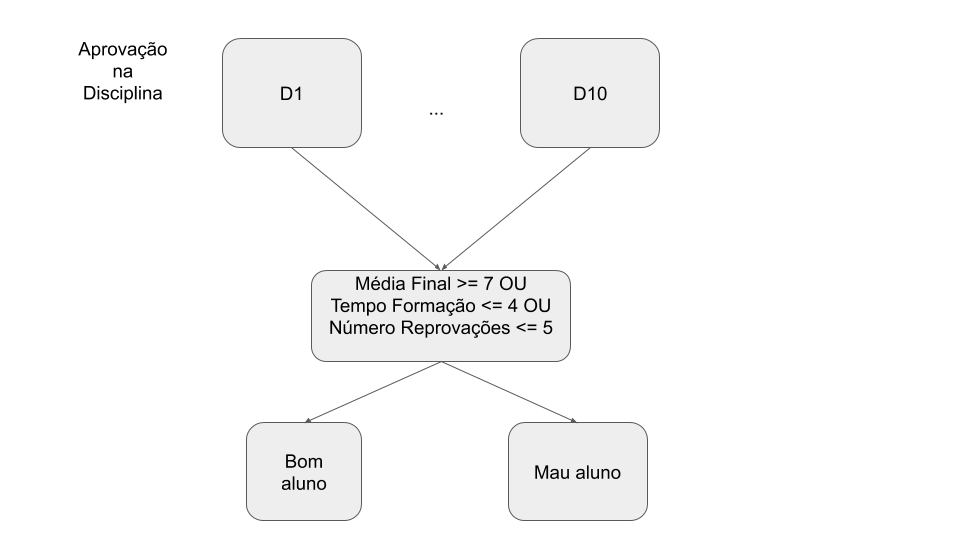

In [0]:
from IPython.display import Image
Image('Modelo Redes Bayesianas.png')

## Implementação do pré-processamento

In [0]:
# Carregando a base dados
from google.colab import files
uploaded = files.upload()

Saving baseDeDados.csv to baseDeDados.csv


In [0]:
import pandas as pd

# A base de dados abaixo será utilizada para o treinamento e teste da rede bayesiana
dataset = pd.read_csv('baseDeDados.csv', sep=';')

In [0]:
# Elimina as colunas indesejadas
data = dataset.drop([ 'idade_conclusao_ensino_medio',
       'uf_naturalidade_discente', 'discente_estudou_escola_publica?',
       'ano_conclusao_ensino_medio', 'nome_municipio_curso',
       'nome_campus_curso', 'nome_curso', 'grau_academico', 'modalidade',
       'turno', 'ingresso_judicial?', 'forma_ingresso',
       'especificidade_ingresso_ps', 'categoria_ingresso_ps',
       'opcao_participacao_ps', 'opcao_aprovacao_ps', 'nota_liguagem_enem',
       'nota_ciencias_humanas_enem', 'nota_ciencias_natureza_enem',
       'nota_matematica_enem', 'nota_redacao_enem', 'nota_linguagem_sisu',
       'nota_ciencias_humanas_sisu', 'nota_ciencias_natureza_sisu',
       'nota_matematica_sisu', 'nota_redacao_sisu', 'nota_no_curso_sisu',
       'nota_corte_curso_sisu','ch_total_integralizada_discente', 'discente_percentual_integralizacao',
       'codigo_matriz_curricular','ch_total_minima_matriz_curricular',
       'ch_maxima_semestre_matriz_curricular',
       'prazo_conclusao_minino_matriz_curricular',
       'prazo_conclusao_medio_matriz_curricular',
       'prazo_conclusao_maximo_matriz_curricular',
       'matriz_semestre_previsto_cursar_compomente', 'codigo_turma_componente',
       'ano_periodo_oferta_turma', 'turma_ead?',
       'ano_periodo_cursado_componente', 'semestre_previsto_componente',
       'ch_total_componente', 'frequencia_discente_componente',
       'quantidade_reprovacoes_neopt', 'ano_nascimento_discente', 'ano_periodo_ingresso',
       'ano_periodo_inativacao', 'motivo_inativacao', 'data_inativacao',
       'data_colacao_grau', 'media_global_atual_matriz_curricular', 'semestre_cursado',
       'codigo_componente', 'quantidade_trancamentos', 'quantidade_reprovacoes_nc', 'quantidade_reprovacoes_nl',
       'quantidade_reprovacoes_neobr'], axis=1)

In [0]:
class Preprocessamento:
    def __init__(self, data):
        self.lista_id = []               # Lista de id's dos alunos
        self.lista_num_reprovacoes = []  # Lista do número de reprovações
        self.class_formacao = []         # Lista com as classes geradas a partir do ano de formação dos alunos
        self.class_reprovacao = []       # Lista com as classes geradas a partir do número de reprovações dos alunos
        self.class_media = []            # Lista com as classes geradas a partir da média global (final) dos alunos
        self.data = data                 # DataFrame com os dados dos alunos
        self.disciplinas = ['PC1', 'IC', 'C1', 'MD', 'LM', 'PC2', 'AL', 'FC', 'SD', 'C2']
        self.data_frame = None
        self.modelo = None
                
    def captura_ids_alunos(self):
        # Número de alunos que se formaram
        self.lista_id = [] # Lista que guarda os id's eliminando repetições
        for i in self.data.id:
            if i not in self.lista_id:
                self.lista_id.append(i)
                
    def gera_matriz_do_modelo(self):
        l = [0] * len(self.disciplinas)
        dados = [l] * len(self.lista_id)
        self.data_frame = pd.DataFrame(dados, columns=self.disciplinas) 
        #self.data_frame['id'] = self.lista_id
        
        ind = 0
        for i in self.lista_id:
            df = self.data[data.id == i] # Filtra as disciplinas de cada aluno
            df = df[df.situacao_discente_componente != 'AP'] # Filtra as reprovações
            df = df.drop_duplicates(subset='id', keep='first', inplace=False) # Remove as duplicatas, pois um aluno pode reprovar várias vezes na mesma disciplina
            
            for disc in list(df.nome_componente):
                if disc == 'PROGRAMAÇÃO DE COMPUTADORES 1 CN':
                    self.data_frame.loc[ind, 'PC1'] = 1

                if disc == 'INTRODUÇÃO À COMPUTAÇÃO':
                    self.data_frame.loc[ind, 'IC'] = 1

                if disc == 'CÁLCULO 1':
                    self.data_frame.loc[ind, 'C1'] = 1

                if disc == 'MATEMÁTICA DISCRETA':
                    self.data_frame.loc[ind, 'MD'] = 1

                if disc == 'LÓGICA MATEMÁTICA':
                    self.data_frame.loc[ind, 'LM'] = 1

                if disc == 'PROGRAMAÇÃO DE COMPUTADORES 2 CN':
                    self.data_frame.loc[ind, 'PC2'] = 1

                if disc == 'CÁLCULO 2':
                    self.data_frame.loc[ind, 'C2'] = 1

                if disc == 'ÁLGEBRA LINEAR':
                    self.data_frame.loc[ind, 'AL'] = 1

                if disc == 'data_frame PARA COMPUTAÇÃO':
                    self.data_fram.loc[ind, 'FC'] = 1

                if disc == 'SISTEMAS DIGITAIS':
                    self.data_frame.loc[ind, 'SD'] = 1
            ind += 1
                    
    def numero_de_reprovacoes(self):
        # Lista que guarda o número de reprovações de cada aluno
        # Cada posição da lista corresponde a um aluno graduado

        for i in self.lista_id:
            df = self.data[data.id == i] # Filtra as disciplinas de cada aluno
            df = df[df.situacao_discente_componente != 'AP'] # Filtra as reprovações
            numero_rep = df.shape[0] # Só vai restar as reprovações, o número de linhas é a quantidade de reprovações
            self.lista_num_reprovacoes.append(numero_rep)
            
        for num in self.lista_num_reprovacoes:
            # Se o número de reprovações for maior que 5, então é um mau aluno
            if num > 5:
                self.class_reprovacao.append(0) # Classe 0 indica 'mau aluno'
            else:
                # Se número de reprovações <= 5
                self.class_reprovacao.append(1) # Classe 1 indica 'bom aluno'
            
    def remove_duplicatas(self):
        # Removendo duplicatas, deixando apenas uma linha por aluno
        self.data = self.data.drop_duplicates(subset='id', keep='first', inplace=False)
    
    def tempo_formacao(self):
        # Gera as classes para o aprendizado supervisionado

        idade_in  = list(self.data.idade_ingresso_universidade) # Idade que entrou na universidade (ingresso)
        idade_out = list(self.data.idade_colacao_grau)          # Idade que saiu da universidade (se formou)

        for i in range(len(self.data)):
            # Se a idade que egresso for maior que a idade de ingresso, então o aluno não se formou em 4 anos
            if (idade_out[i] - idade_in[i]) > 4:
                self.class_formacao.append(0) # Classe 0 indica 'mau aluno'
            else:
                # Se formou em 4 anos
                self.class_formacao.append(1) # Classe 1 indica 'bom aluno'
                
    def media_global(self):
        media_final = list(self.data.media_global_atual_discente)
        
        for media in media_final:
            # Se a média global do aluno for menor que 7, então é um mau aluno
            if media < 7:
                self.class_media.append(0) # Classe 0 indica 'mau aluno'
            else:
                # Se média glogal >= 7
                self.class_media.append(1) # Classe 1 indica 'bom aluno'
                
    def constroi_modelo(self):
        keys = ['modelo', 'class_reprovacao', 'class_media', 'class_formacao', 'id']
        self.modelo = dict.fromkeys(keys)
        
        self.modelo['modelo'] = self.data_frame
        self.modelo['class_reprovacao'] = self.class_reprovacao
        self.modelo['class_media'] = self.class_media
        self.modelo['class_formacao'] = self.class_formacao
        self.modelo['id'] = self.lista_id
        

In [0]:
# Só pega alunos GRADUADOS
data_grad = data[data.situacao_discente == 'GRADUADO']

# Só pega alunos ATIVOS
data_ativos = data[data.situacao_discente == 'ATIVO']

In [0]:
data_grad.head()

,id,idade_ingresso_universidade,idade_colacao_grau,situacao_discente,media_global_atual_discente,nome_componente,nota_discente_componente,situacao_discente_componente
0,1,19,26.0,GRADUADO,5.01,CÁLCULO 1,7.3,AP
1,1,19,26.0,GRADUADO,5.01,LÓGICA MATEMÁTICA,6.8,AP
2,1,19,26.0,GRADUADO,5.01,MATEMÁTICA DISCRETA,5.0,AP
3,1,19,26.0,GRADUADO,5.01,FÍSICA PARA COMPUTAÇÃO,5.0,AP
4,1,19,26.0,GRADUADO,5.01,ÁLGEBRA LINEAR,4.2,RM


Text(0, 0.5, 'Reprovações')

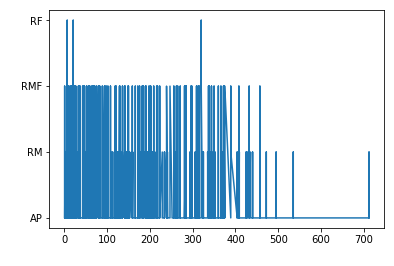

In [0]:
plt.plot(data_grad.id,data_grad.situacao_discente_componente)

plt.xlabel('ID de Aluno', color='white')
plt.ylabel('Reprovações',color='white')

        O gráfico acima explicita o tanto que os alunos reprovam nas matérias dos primeiros dois semestres.

In [0]:
# Objeto do dataframe dos alunos graduados
grad   = Preprocessamento(data_grad)

# Preparando os dados dos alunos GRADUADOS
grad.captura_ids_alunos()      # Função que captura dos id's dos alunos ignorando repetições
grad.gera_matriz_do_modelo()   # Função que gera a matriz que vai construir o modelo final
grad.numero_de_reprovacoes()   # Função que conta o número de reprovações dos alunos e gera as classes a partir do número de reprovações
grad.remove_duplicatas()       # Função que remove duplicatas
grad.media_global()            # Função que obtém a média global dos alunos e gera as classes a partir da nota
grad.tempo_formacao()          # Função que verifica se o aluno se formou 4 anos (ou não) e gera as classes a partir dessa informação
grad.constroi_modelo()         # Função que constrói o modelo final
data_grad = grad.modelo

In [0]:
# Modelo gerado
data_grad['modelo'].head()

,PC1,IC,C1,MD,LM,PC2,AL,FC,SD,C2
0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [0]:
# Caso seja necessário criar exemplos de alunos ativo pra prever se eles conseguirão terminar o curso em 4 anos

# Objeto do dataframe dos alunos ativos
ativos = Preprocessamento(data_ativos)

# Preparando os dados dos alunos ATIVOS
ativos.captura_ids_alunos()      # Função que captura dos id's dos alunos ignorando repetições
ativos.gera_matriz_do_modelo()   # Função que gera a matriz que vai construir o modelo final
ativos.numero_de_reprovacoes()   # Função que conta o número de reprovações dos alunos e gera as classes a partir do número de reprovações
ativos.remove_duplicatas()       # Função que remove duplicatas
ativos.media_global()            # Função que obtém a média global dos alunos e gera as classes a partir da nota
ativos.tempo_formacao()          # Função que verifica se o aluno se formou 4 anos (ou não) e gera as classes a partir dessa informação
ativos.constroi_modelo()         # Função que constrói o modelo final
data_ativos = ativos.modelo

In [0]:
# Modelo dos alunos ATIVOS
data_ativos['modelo'].head()

,PC1,IC,C1,MD,LM,PC2,AL,FC,SD,C2
0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [0]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np

In [0]:
# Cria o modelo do algoritmo
clf = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

### Treinamento do algoritmo

- Modelo: dos alunos graduados
- Classes: número de reprovações

In [0]:
# Treina o modelo com as classes geradas a partir do número de reprovação
clf.fit(data_grad['modelo'], np.array(data_grad['class_reprovacao']))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Treinamento do algoritmo

- Modelo: dos alunos graduados
- Classes: tempo de formação

In [0]:
# Treina o modelo com as classes geradas a partir do tempo de formação
clf.fit(data_grad['modelo'], np.array(data_grad['class_formacao']))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Treinamento do algoritmo

- Modelo: dos alunos graduados
- Classes: média final

In [0]:
# Treina o modelo com as classes geradas a partir da média final
clf.fit(data_grad['modelo'], np.array(data_grad['class_media']))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# Retorna a probabilidade das amostras para cada classe no modelo
# As colunas correspondem às classes na ordem classificada, conforme aparecem no atributo classes
prob = clf.predict_proba([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]) # Reprovou nas 10 primeiras disciplinas

In [0]:
print("Probabilidade de ser bom aluno: %.2f%%" %(prob[0][0] * 100))
print("Probabilidade de ser mau aluno: %.2f%%" %(prob[0][1] * 100))

Probabilidade de ser bom aluno: 31.37%
Probabilidade de ser mau aluno: 68.63%


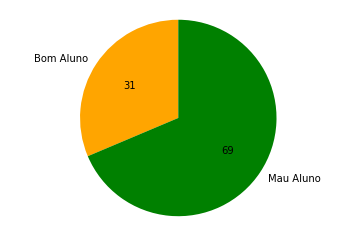

In [0]:
import matplotlib.pyplot as plt 
import numpy as np



labels = ['Bom Aluno', 'Mau Aluno']
probal = [prob[0][0]*100, prob[0][1]*100]
cores = ['orange', 'green']
total = sum(probal)
plt.pie(probal, labels=labels, colors=cores, autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=False, startangle=90)

plt.axis('equal') 
plt.show()

In [0]:
prob = clf.predict_proba([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]) # Foi aprovado nas 10 primeiras disciplinas

In [0]:
print("Probabilidade de ser bom aluno: %.2f%%" %(prob[0][0] * 100))
print("Probabilidade de ser mau aluno: %.2f%%" %(prob[0][1] * 100))

Probabilidade de ser bom aluno: 55.88%
Probabilidade de ser mau aluno: 44.12%


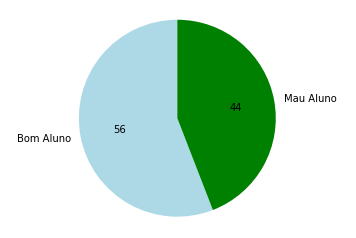

In [0]:
import matplotlib.pyplot as plt 
import numpy as np



labels = ['Bom Aluno', 'Mau Aluno']
probal = [prob[0][0]*100, prob[0][1]*100]
cores = ['lightblue', 'green']
total = sum(probal)
plt.pie(probal, labels=labels, colors=cores, autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=False, startangle=90)

plt.axis('equal') 
plt.show()

### Teste com alunos ativos

In [0]:
prob = clf.predict_proba(data_ativos['modelo'])

In [0]:
ids = data_ativos['id']
for i in range(len(prob)):
    lista = prob[i]
    print("Aluno com ID: %d" %(ids[i]))
    print("Probabilidade de ser bom aluno: %.2f%%" %(lista[0] * 100))
    print("Probabilidade de ser mau aluno: %.2f%%" %(lista[1] * 100))     
    print("---------------------------------------")

Aluno com ID: 60
Probabilidade de ser bom aluno: 50.38%
Probabilidade de ser mau aluno: 49.62%
---------------------------------------
Aluno com ID: 76
Probabilidade de ser bom aluno: 80.25%
Probabilidade de ser mau aluno: 19.75%
---------------------------------------
Aluno com ID: 111
Probabilidade de ser bom aluno: 73.03%
Probabilidade de ser mau aluno: 26.97%
---------------------------------------
Aluno com ID: 122
Probabilidade de ser bom aluno: 57.52%
Probabilidade de ser mau aluno: 42.48%
---------------------------------------
Aluno com ID: 143
Probabilidade de ser bom aluno: 50.38%
Probabilidade de ser mau aluno: 49.62%
---------------------------------------
Aluno com ID: 161
Probabilidade de ser bom aluno: 69.29%
Probabilidade de ser mau aluno: 30.71%
---------------------------------------
Aluno com ID: 168
Probabilidade de ser bom aluno: 50.38%
Probabilidade de ser mau aluno: 49.62%
---------------------------------------
Aluno com ID: 169
Probabilidade de ser bom aluno: 

In [0]:
pred_reprovacao = clf.predict(data_ativos['modelo'])
pred_formacao   = clf.predict(data_ativos['modelo'])
pred_media      = clf.predict(data_ativos['modelo'])

In [0]:
from sklearn import metrics

- Acurácia, precisão, recall e F1-score baseado na predição do número de reprovações.
- Queremos saber o desempenho do modelo a partir das classes que geramos com o número de reprovações.

In [0]:
print("Acurácia...: %.2f" %(metrics.accuracy_score(data_ativos['class_reprovacao'],pred_reprovacao) * 100))
print("Precision..: %.2f" %(metrics.precision_score(data_ativos['class_reprovacao'],pred_reprovacao,average='macro') * 100))
print("Recall.....: %.2f" %(metrics.recall_score(data_ativos['class_reprovacao'],pred_reprovacao, average='macro') * 100))
print("F1-Score...: %.2f" %(metrics.f1_score(data_ativos['class_reprovacao'],pred_reprovacao, average='macro') * 100))

Acurácia...: 57.34
Precision..: 28.91
Recall.....: 49.29
F1-Score...: 36.44


- Acurácia, precisão, recall e F1-score baseado no tempo de formação.
- Queremos saber o desempenho do modelo a partir das classes que geramos com o tempo de formação.

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
print("Acurácia...: %.2f" %(metrics.accuracy_score(data_ativos['class_formacao'],pred_formacao) * 10000))
print("Precision..: %.2f" %(metrics.precision_score(data_ativos['class_formacao'],pred_formacao,average='macro') * 100))
print("Recall.....: %.2f" %(metrics.recall_score(data_ativos['class_formacao'],pred_formacao, average='macro') * 10000))
print("F1-Score...: %.2f" %(metrics.f1_score(data_ativos['class_formacao'],pred_formacao, average='macro') * 10000))

Acurácia...: 83.10
Precision..: 50.00
Recall.....: 41.55
F1-Score...: 82.42


- Acurácia, precisão, recall e F1-score baseado na média global.
- Queremos saber o desempenho do modelo a partir das classes que geramos pela média global.

In [0]:
print("Acurácia...: %.2f" %(metrics.accuracy_score(data_ativos['class_media'],pred_media) * 100))
print("Precision..: %.2f" %(metrics.precision_score(data_ativos['class_media'],pred_media,average='macro') * 100))
print("Recall.....: %.2f" %(metrics.recall_score(data_ativos['class_media'],pred_media, average='macro') * 100))
print("F1-Score...: %.2f" %(metrics.f1_score(data_ativos['class_media'],pred_media, average='macro') * 100))

Acurácia...: 80.89
Precision..: 40.78
Recall.....: 49.49
F1-Score...: 44.72


In [0]:
arranjo = []
arranjo.append([metrics.accuracy_score(data_ativos['class_reprovacao'],pred_reprovacao) * 100, metrics.precision_score(data_ativos['class_reprovacao'],pred_reprovacao,average='macro') * 100, metrics.recall_score(data_ativos['class_reprovacao'],pred_reprovacao, average='macro') * 100, metrics.f1_score(data_ativos['class_reprovacao'],pred_reprovacao, average='macro') * 100])
arranjo.append([metrics.accuracy_score(data_ativos['class_formacao'],pred_formacao) * 10000, metrics.precision_score(data_ativos['class_formacao'],pred_formacao,average='macro') * 100, metrics.recall_score(data_ativos['class_formacao'],pred_formacao, average='macro') * 10000, metrics.f1_score(data_ativos['class_formacao'],pred_formacao, average='macro') * 10000])
arranjo.append([metrics.accuracy_score(data_ativos['class_media'],pred_media) * 100, metrics.precision_score(data_ativos['class_media'],pred_media,average='macro') * 100, metrics.recall_score(data_ativos['class_media'],pred_media, average='macro') * 100, metrics.f1_score(data_ativos['class_media'],pred_media, average='macro') * 100])

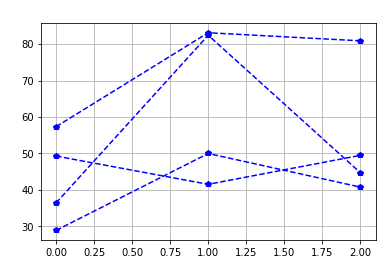

In [0]:
plt.plot(arranjo,linestyle='--', color='blue', marker='p')
plt.title('Métricas', color="white")

plt.grid(True)
plt.xlabel("Reprovação, Formação e Média", color="white")
plt.ylabel("Métricas", color="white")

plt.show()

O gráfico acima descreve a variação das métricas avaliadas.

**A primeira linha mostra a variação da métrica Acurácia nos três casos avaliados (Número de Reprovações, Tempo de Formação e Média Final).**

A segunda mostra informações sobre a precisão do modelo, a terceira mostra sobre o recall e a quarta é sobre o F1. 

#Avaliação dos resultados

- O grupo deve avaliar se o modelo (e os dados utilizados) é adequado para tratar o problema proposto.

- Deve ser indicado como  utilizar a solução apresentada para resolver o problema proposto. Isto é, novos alunos devem ser submetidos ao modelo e os resultados apresentados.


Text(0, 0.5, 'Probabilidade de ser Bom Aluno')

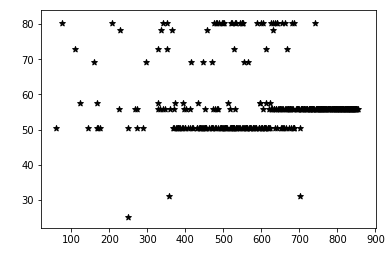

In [0]:
for i in range(len(prob)):
    lista = prob[i] 
    plt.scatter(ids[i], lista[0]*100, marker="*", color='black')
plt.xlabel('ID de Aluno', color='white')
plt.ylabel('Probabilidade de ser Bom Aluno', color='white')

> > > > > > > >     O modelo demonstrou ter uma tendência ao equilibrio anormal para o conjunto de dados, embora haja alunos fora da curva, a maioria se situa entre os 40% e os 60%

Os dados utilizados ainda não são o suficiente para provar alguma relação, mas é possível, já com a base de dados atual, ter uma ideia do que possa haver. 
O modelo, por ser probabilísitico,  é aproximado.

Seria o ideal para ver previamente se há alguma relação formal a priori para então ir a fundo na análise dos dados.

O modelo é adequado para tratar problemas do mesmo tipo, indicando probabilidades de certas informações estarem associadas, possibilitando aproveitamento das relações possíveis, usando as estatísticas a favor do usuário ou cliente a quem visa o estudo.


*Esses são os dados de validação, ou seja, já passados os testes. A rede bayesiana se mostrou conservadora, sendo portanto, com a quantidade de dados que temos, insuficiente para comprovar a relação entre os dados. 
Porém, caso a base fosse mais robusta, a rede seria uma excelente ferramenta para análise das relações.*

*Novos alunos foram utilizados para validar a rede, os gráficos aqui plotados foram obtidos com a informação de alunos em situação Ativo no sistema. O modelo sugere incerteza quanto a alunos ainda em ativo, eles podem ser ou não alunos bons, não ficou provado alguma impossibilidade de o ser, embora tenham alguns que obtiveram classificação bem baixa no modelo, como por exemplo as três estrelas situadas abaixo de 30% no gráfico acima.*

*Portanto, a análise é que o modelo é adequado para tratamento de problemas dessa natureza, onde há o bom uso de probabilidades, temos que lembrar que é um modelo não-determinístico, não há resultado ideal. Apesar do modelo ter convergido para um equilíbrio, acredito que seria suficiente para resolver problemas dessa natureza, sendo, como dito acima, uma boa ferramenta de análise.*



**Abaixo o gráfico complementar, ou seja, a probabilidade de alunos serem maus de acordo com as aprovações nas disciplinas dos primeiros períodos.**

Text(0, 0.5, 'Probabilidade de ser Mau Aluno')

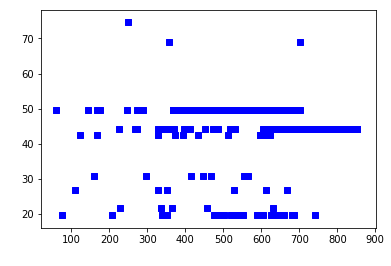

In [0]:
for i in range(len(prob)):
    lista = prob[i] 
    plt.scatter(ids[i], lista[1]*100, marker="s", color='blue')
plt.xlabel('ID de Aluno', color='white')
plt.ylabel('Probabilidade de ser Mau Aluno', color='white')